In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17192995670409218645
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1749391771
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12004685186952578367
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [7]:
from fastai.callback.all import *



In [8]:
from fastai import *
from fastai.vision import *

In [9]:
from fastai.vision.all import *

In [10]:
path   = Path('D://LEAF PROJECT/data/total traininng and valid data')

In [11]:
path.ls()

(#3) [Path('D:/LEAF PROJECT/data/total traininng and valid data/models'),Path('D:/LEAF PROJECT/data/total traininng and valid data/train'),Path('D:/LEAF PROJECT/data/total traininng and valid data/valid')]

In [12]:
from fastai.basics import *

In [13]:
import fastai

In [15]:
import wandb
wandb.login()

wandb: Currently logged in as: ashwalaraviteja (karunyauniv). Use `wandb login --relogin` to force relogin


True

In [16]:
import numpy as np 
import random

# 🐝 Step 1: Define training function that takes in hyperparameter 
# values from `wandb.config` and uses them to train a model and return metric
def train_one_epoch(epoch, lr, bs): 
  acc = 0.25 + ((epoch/30) +  (random.random()/10))
  loss = 0.2 + (1 - ((epoch-1)/10 +  random.random()/5))
  return acc, loss

def evaluate_one_epoch(epoch): 
  acc = 0.1 + ((epoch/20) +  (random.random()/10))
  loss = 0.25 + (1 - ((epoch-1)/10 +  random.random()/6))
  return acc, loss

def main():
    # Use the wandb.init() API to generate a background process 
    # to sync and log data as a Weights and Biases run.
    # Optionally provide the name of the project. 
    run = wandb.init(project='training using RESNET101')

    # note that we define values from `wandb.config` instead of 
    # defining hard values
    lr  =  wandb.config.lr
    bs = wandb.config.batch_size
    epochs = wandb.config.epochs

    for epoch in np.arange(1, epochs):
      train_acc, train_loss = train_one_epoch(epoch, lr, bs)
      val_acc, val_loss = evaluate_one_epoch(epoch)

      wandb.log({
        'epoch': epoch, 
        'train_acc': train_acc,
        'train_loss': train_loss, 
        'val_acc': val_acc, 
        'val_loss': val_loss
      })

In [17]:
# 🐝 Step 2: Define sweep config
sweep_configuration = {
    'method': 'random',
    'name': 'sweep',
    'metric': {'goal': 'maximize', 'name': 'val_acc'},
    'parameters': 
    {
        'batch_size': {'values': [16]},
        'epochs': {'values': [8]},
        'lr': {'max': 0.1, 'min': 0.0001}
     }
}

In [18]:
# 🐝 Step 3: Initialize sweep by passing in config
sweep_id = wandb.sweep(sweep=sweep_configuration, project='training using RESNET101')

Create sweep with ID: ewq65no2
Sweep URL: https://wandb.ai/karunyauniv/training%20using%20RESNET101/sweeps/ewq65no2


In [19]:
wandb.agent(sweep_id, function=main, count=4)

wandb: Agent Starting Run: 8sdxw02j with config:
wandb: 	batch_size: 16
wandb: 	epochs: 8
wandb: 	lr: 0.045224939361948456
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch,▁▂▃▅▆▇█
train_acc,▁▂▃▃▆▅█
train_loss,██▆▆▄▄▁
val_acc,▁▁▂▄▅▇█
val_loss,██▅▄▃▃▁
epoch,7
train_acc,0.55218
train_loss,0.42493
val_acc,0.50528
val_loss,0.56297


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c4qznxdm with config:
wandb: 	batch_size: 16
wandb: 	epochs: 8
wandb: 	lr: 0.04549565304610453
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch,▁▂▃▅▆▇█
train_acc,▁▁▃▄▅▅█
train_loss,█▇▆▄▃▃▁
val_acc,▁▂▃▃▄▅█
val_loss,█▇▆▅▄▁▂
epoch,7
train_acc,0.55231
train_loss,0.52379
val_acc,0.53417
val_loss,0.63963


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: u55drxw2 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 8
wandb: 	lr: 0.031740536657980885
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch,▁▂▃▅▆▇█
train_acc,▁▂▅▃▅▅█
train_loss,█▅▆▅▃▂▁
val_acc,▁▂▂▄▅▇█
val_loss,█▇▅▅▃▃▁
epoch,7
train_acc,0.56176
train_loss,0.48151
val_acc,0.50467
val_loss,0.52058


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: en0ic9hr with config:
wandb: 	batch_size: 16
wandb: 	epochs: 8
wandb: 	lr: 0.04708811440757978
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch,▁▂▃▅▆▇█
train_acc,▁▂▃▅▅▇█
train_loss,█▆▆▅▄▂▁
val_acc,▁▂▃▅▅██
val_loss,█▆▅▃▄▂▁
epoch,7
train_acc,0.56922
train_loss,0.42772
val_acc,0.47242
val_loss,0.58024


In [14]:
item_tfms = [Resize(256,256)]
data = ImageDataLoaders.from_folder(path,bs=16,item_tfms=item_tfms,device=torch.device('cuda'))

In [15]:
learn = cnn_learner(data,
                    resnet101,
                   metrics=[ accuracy,error_rate])

C:\Users\ravit\anaconda3\envs\GPU2\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\ravit\anaconda3\envs\GPU2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\ravit\anaconda3\envs\GPU2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
from fastai.callback.wandb import *

In [21]:
wandb.init(project="training using RESNET101", entity="karunyauniv")

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


In [22]:
cn = WandbCallback(log ="all")

In [ ]:
learn.fit_one_cycle(7
                    ,cbs = [EarlyStoppingCallback(monitor = 'accuracy',min_delta=0.01,patience = 5),SaveModelCallback(monitor = 'accuracy',min_delta=0.01),cn])

In [35]:
CUDA_LAUNCH_BLOCKING=1



In [36]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [37]:
device_lib.list_local_devices()

RuntimeError: Failed to query available memory for GPU 0

In [26]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  215315 KB |    2765 MB |  162496 GB |  162496 GB |\n|       from large pool |  158720 KB |    2710 MB |  162370 GB |  162370 GB |\n|       from small pool |   56595 KB |      57 MB |     126 GB |     126 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |  215315 KB |    2765 MB |  162496 GB |  162496 GB |\n|       from large pool |  158720 KB |    2710 MB |

In [47]:
learn.load_state_dict(torch.load('D://LEAF PROJECT/data/resnet 101 first sweep saved model/model.pth'))

<All keys matched successfully>

In [24]:
learn.fit_one_cycle(5
                    ,cbs = [EarlyStoppingCallback(monitor = 'accuracy',min_delta=0.01,patience = 5),SaveModelCallback(monitor = 'accuracy',min_delta=0.01),cn])

epoch,train_loss,valid_loss,accuracy,error_rate,time


KeyboardInterrupt: 

In [49]:
learn.validate()

(#3) [0.2534426748752594,0.945874810218811,0.05412520095705986]

In [12]:
learn.load_state_dict(torch.load('D://LEAF PROJECT/data/total traininng and valid data/models/model.pth'))

<All keys matched successfully>

In [25]:
learn.fit_one_cycle(8
                    ,cbs = [EarlyStoppingCallback(monitor = 'accuracy',min_delta=0.01,patience = 4),SaveModelCallback(monitor = 'accuracy',min_delta=0.01),cn])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.151702,0.276146,0.944302,0.055698,2:03:54
1,0.223433,0.278180,0.941188,0.058812,2:00:57
2,0.204114,0.320458,0.936565,0.063435,2:00:19
3,0.224768,0.273055,0.944366,0.055634,2:01:17
4,0.150434,0.265437,0.944687,0.055313,2:10:42


Better model found at epoch 0 with accuracy value: 0.9443017840385437.
No improvement since epoch 0: early stopping


In [26]:
torch.save(learn.state_dict(), 'D://94.430.pth after 40 hours with breaking of 2 hours') 

In [5]:
# on march 3
import torch
model = torch.load("D://94.430.pth after 40 hours with breaking of 2 hours")
model.eval()

FileNotFoundError: [Errno 2] No such file or directory: 'D://94.430.pth after 40 hours with breaking of 2 hours'

In [ ]:
learn.load()

In [20]:
learn.load_state_dict(torch.load('D://LEAF PROJECT/data/resnet 101 94.45 accuracy saved model/model.pth'))

<All keys matched successfully>

In [21]:
learn.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [22]:
learn.validate()

(#3) [0.26739901304244995,0.9445264935493469,0.05547351390123367]

In [24]:
import matplotlib.pyplot as plt
plt.plot(learn.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"],loc = "upperleft")
plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

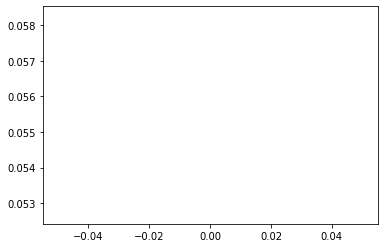

In [37]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [39]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms

# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

images, labels = next(iter(data))

grid = torchvision.utils.make_grid(images)
writer.add_image('images', grid, 0)
writer.add_graph(learn, images)
writer.close()

AttributeError: 'Sequential' object has no attribute 'plot'

In [42]:
!pip install tensorboard

!tensorboard --logdir=runs

     ------------------------------------ 895.9/895.9 kB 266.1 kB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ravit\\anaconda3\\envs\\GPU2\\Lib\\site-packages\\google\\~-otobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



^C


In [ ]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)